In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def load_and_clean(file_path):
    # Load the original data
    df = pd.read_csv(file_path)
    
    # Prepare column lists
    allele_cols = [f"Allele {i}" for i in range(1, 101)]
    size_cols = [f"Size {i}" for i in range(1, 101)]
    height_cols = [f"Height {i}" for i in range(1, 101)]
    
    # Create a temporary identifier for each original row
    df['temp_id'] = df.index
    
    # Melt each set of columns separately
    alleles = df.melt(
        id_vars=['Sample File', 'Marker', 'Dye', 'temp_id'],
        value_vars=allele_cols,
        var_name='peak_num',
        value_name='Allele'
    )
    
    sizes = df.melt(
        id_vars=['Sample File', 'Marker', 'Dye', 'temp_id'],
        value_vars=size_cols,
        var_name='peak_num',
        value_name='Size'
    )
    
    heights = df.melt(
        id_vars=['Sample File', 'Marker', 'Dye', 'temp_id'],
        value_vars=height_cols,
        var_name='peak_num',
        value_name='Height'
    )
    
    # Clean up the peak number (extract just the number)
    for df_part in [alleles, sizes, heights]:
        df_part['peak_num'] = df_part['peak_num'].str.extract('(\d+)').astype(int)
    
    # Merge the melted DataFrames
    combined = alleles.merge(
        sizes, 
        on=['Sample File', 'Marker', 'Dye', 'temp_id', 'peak_num']
    ).merge(
        heights, 
        on=['Sample File', 'Marker', 'Dye', 'temp_id', 'peak_num']
    )
    
    # Remove rows with missing alleles
    combined = combined[combined['Allele'].notna()]
    
    # Drop the temporary ID column
    combined = combined.drop(columns=['temp_id'])
    
    return combined

In [6]:
cleaned_data = load_and_clean("../datasets/PROVEDIt_1-5-Person CSVs Filtered/PROVEDIt_1-5-Person CSVs Filtered_3130_PP16HS32cycles/1-Person/5 sec/RD12-0002_PP16HS_5sec_GM_F_1P.csv")

/var/folders/gn/8cmn0qdj1mx7g0mxnt5q722h0000gp/T/ipykernel_36744/4134585722.py:3: DtypeWarning: Columns (99,102,105,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [8]:
# View the first few rows of cleaned data
cleaned_data.head()

,Sample File,Marker,Dye,peak_num,Allele,Size,Height
0,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,D3S1358,B,1,OL,94.68,5.0
1,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,TH01,B,1,OL,148.69,3.0
2,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,D21S11,B,1,OL,195.84,7.0
3,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,D18S51,B,1,OL,285.51,4.0
4,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,Penta E,B,1,OL,369.36,3.0


In [9]:
# Filter for a specific sample and marker
sample_data = cleaned_data[
    (cleaned_data['Sample File'] == "A02-RD12-0002-35-0.5PP16-001.5sec.fsa") &
    (cleaned_data['Marker'] == "D3S1358")
]
sample_data

,Sample File,Marker,Dye,peak_num,Allele,Size,Height
0,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,D3S1358,B,1,OL,94.68,5.0
5680,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,D3S1358,B,2,OL,98.27,5.0
11360,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,D3S1358,B,3,OL,98.92,4.0
17040,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,D3S1358,B,4,OL,99.78,2.0
22720,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,D3S1358,B,5,13,113.89,17.0
28400,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,D3S1358,B,6,OL,116.05,1.0
34080,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,D3S1358,B,7,14,118.13,205.0
39760,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,D3S1358,B,8,15,122.28,2359.0
45440,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,D3S1358,B,9,16,126.25,344.0
51120,A02-RD12-0002-35-0.5PP16-001.5sec.fsa,D3S1358,B,10,17,130.36,2870.0


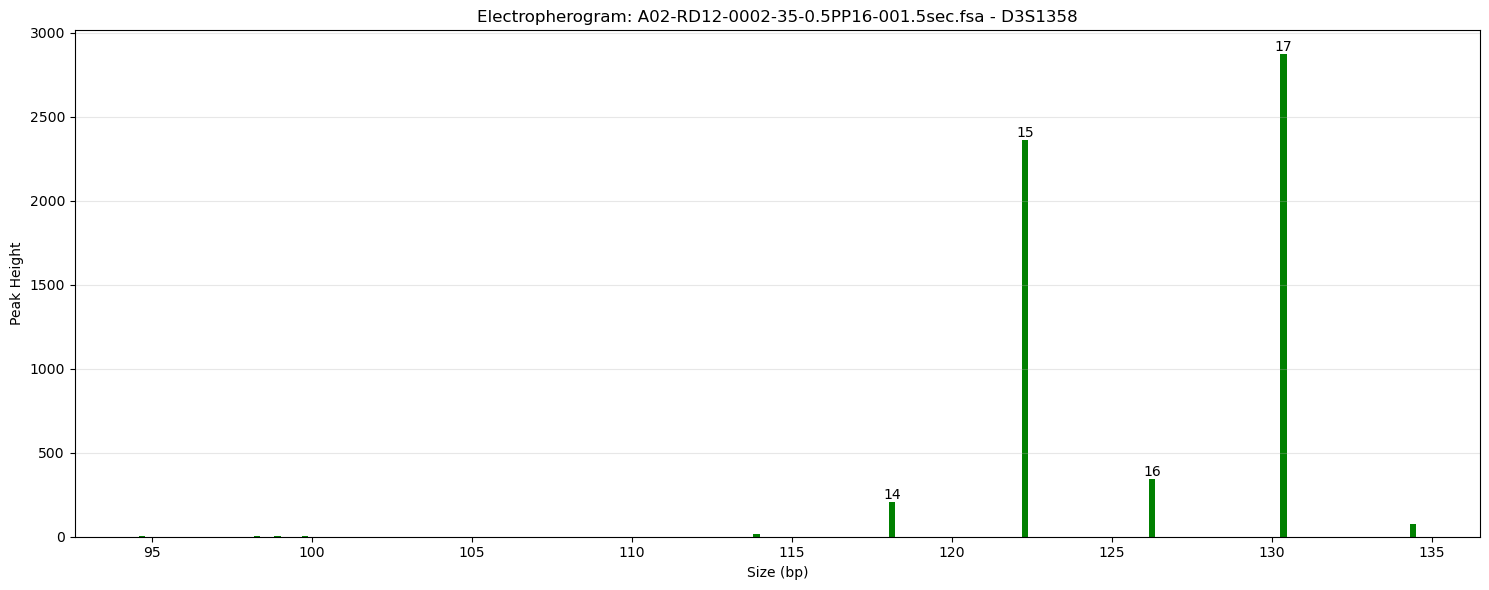

In [12]:
def plot_epg(sample_file, marker, data):
    subset = data[(data['Sample File'] == sample_file) & 
                 (data['Marker'] == marker)]
    
    plt.figure(figsize=(15, 6))
    
    # Plot each peak
    for _, row in subset.iterrows():
        plt.bar(row['Size'], row['Height'], 
                width=0.2, 
                color={'A':'blue', 'B':'green', 'C':'black', 'D':'yellow', 'E':'red', 'F':'orange'}.get(row['Dye'], 'gray'))
        
        # Label significant peaks
        if row['Height'] > 100:  # Adjust threshold as needed
            plt.text(row['Size'], row['Height'], 
                    f"{row['Allele']}", 
                    ha='center', va='bottom')
    
    plt.title(f"Electropherogram: {sample_file} - {marker}")
    plt.xlabel("Size (bp)")
    plt.ylabel("Peak Height")
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Example usage
plot_epg("A02-RD12-0002-35-0.5PP16-001.5sec.fsa", "D3S1358", cleaned_data)

In [14]:
def analyze_peaks(data, sample_file, marker, height_threshold=100, stutter_ratio=0.15):
    subset = data[(data['Sample File'] == sample_file) & 
                 (data['Marker'] == marker) &
                 (data['Height'] >= height_threshold)].copy()
    
    # Sort by size
    subset = subset.sort_values('Size')
    
    # Identify potential stutter peaks
    subset['Stutter'] = False
    for i in range(1, len(subset)):
        prev_size = subset.iloc[i-1]['Size']
        curr_size = subset.iloc[i]['Size']
        prev_height = subset.iloc[i-1]['Height']
        curr_height = subset.iloc[i]['Height']
        
        # Check if current peak is ~1 repeat unit smaller than previous
        if abs((curr_size - prev_size) - 4) < 0.5:  # ~4bp for most STRs
            if curr_height/prev_height < stutter_ratio:
                subset.loc[subset.index[i], 'Stutter'] = True
    
    # Filter out stutter peaks
    true_peaks = subset[~subset['Stutter']]
    
    return true_peaks

true_alleles = analyze_peaks(cleaned_data, "A02-RD12-0002-35-0.5PP16-001.5sec.fsa", "D3S1358")
print(true_alleles[['Allele', 'Size', 'Height']])

      Allele    Size  Height
34080     14  118.13   205.0
39760     15  122.28  2359.0
51120     17  130.36  2870.0
